<h1> KNN Classifiers, Image Transformations, and Manipulation by Diego-Ossa</h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Images Acquisition**

## Dataset Kaggle


You upload the JSON file containing your Kaggle API credentials to Colab. This JSON file is required to authenticate and use the Kaggle API within the Colab environment.

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

{}

This command upgrades the Kaggle package to the latest version available in the Python environment. It ensures that you have the most recent features and bug fixes provided by Kaggle.

In [ ]:
!pip install --upgrade kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.8-py3-none-any.whl size=111962 sha256=38befb79ea9c72dc024134bc9d2c2551b58499140bd5366edbb6d42d0be5201d
  Stored in directory: /root/.cache/pip/wheels/b3/86/2d/2df535a84838c858ca91a03805f9c3131573c8e777fd907689
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


These commands create a directory named .kaggle in your home directory (~) if it doesn't already exist. Then, they copy the kaggle.json file, which contains your Kaggle API credentials, to this directory. Finally, they set the appropriate permissions for the kaggle.json file to ensure that only you can read and write to it. This is necessary for security reasons, as the Kaggle API requires your credentials to be stored securely.

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Running kaggle datasets list checks if your Kaggle API is correctly set up and has the necessary permissions to access datasets on Kaggle. If it successfully lists the datasets, then your Kaggle API configuration is correct and you have the necessary permissions.

In [ ]:
! kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                          Online Food Dataset                                  3KB  2024-03-02 18:50:30          13528        267  0.9411765        
syedanwarafridi/vehicle-sales-data                           Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          21647        364  1.0              
kanchana1990/world-air-quality-data-2024-updated             World Air Quality Data 2024 (Updated)                2MB  2024-03-25 15:10:07           1214         31  0.9411765        
bhavikjikadara/student-study-performance                     Student Study Perfo

In [ ]:
import shutil
import zipfile
import os

This code downloads the "clothing-dataset-small" dataset from Kaggle using the <code>kaggle datasets download</code> command. Then, it moves the downloaded file to a specific location in your Google Drive using <code>shutil.move</code>.

In [ ]:
! kaggle datasets download -d abdelrahmansoltan98/clothing-dataset-small

# Ruta al archivo descargado
source_path = 'clothing-dataset-small.zip'

# Ruta de destino en tu Google Drive
destination_path = '/content/drive/MyDrive/Practica2'

# Mover el archivo a Google Drive
shutil.move(source_path, destination_path)

This code unzips the "clothing-dataset-small.zip" file located in your Google Drive. It extracts the contents of the zip file to a specific directory using the <code>zipfile.ZipFile</code> module in Python.

In [ ]:
# Ruta al archivo zip en tu Google Drive
zip_file_path = '/content/drive/MyDrive/Practica2/clothing-dataset-small.zip'

# Directorio de destino para la extracción
extracted_dir_path = '/content/drive/MyDrive/Practica2'

# Descomprimir el archivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# Verificar los archivos extraídos
extracted_files = os.listdir(extracted_dir_path)
print("Archivos extraídos:", extracted_files)

Archivos extraídos: ['train', 'validation']


In [ ]:
# Path to the folder containing the images
folder_path = '/content/drive/MyDrive/Practica2/images/hats'

# List files in the folder
files = os.listdir(folder_path)

# Counter to store the number of images
image_count = 0

# Filter files to include only images
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif']  # You can add more extensions if necessary

for file in files:
    if os.path.isfile(os.path.join(folder_path, file)):
        if os.path.splitext(file)[1].lower() in valid_extensions:
            image_count += 1

# Prints the total number of images found
print("The total number of images in the folder is:", image_count)

The total number of images in the folder is: 149



This code block sets a maximum limit for the number of images to be retained in a folder and then removes the excess images if the total count of images in the folder exceeds that limit.

In [ ]:
# Maximum number of images you want to keep
max_image_number = 150

# Calculate how many images need to be removed
images_to_remove = image_count - max_image_number

# Remove images if there are more than 150
if images_to_remove > 0:
    removed_count = 0
    for file in files:
        if removed_count >= images_to_remove:
            break
        if os.path.isfile(os.path.join(folder_path, file)):
            if os.path.splitext(file)[1].lower() in valid_extensions:
                os.remove(os.path.join(folder_path, file))
                removed_count += 1

# Update the image count after removal
image_count -= images_to_remove

# Print the total number of images after removal
print("After removal, the total number of images in the folder is:", image_count)

After removal, the total number of images in the folder is: 150


## Webscrapping with BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup
import requests
import shutil
import os
from PIL import Image

In [ ]:
# Query para buscar imágenes de zapatos
query = 'pantalones'

# URL del resultado de búsqueda de imágenes en Google
url = f'https://www.google.com/search?q={query}&tbm=isch'

# Realizar la solicitud GET a la URL
response = requests.get(url)

# Crear un objeto BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrar todas las etiquetas 'img' en la página
img_tags = soup.find_all('img')

# Directorio donde se guardarán las imágenes en Google Drive
drive_dir = '/content/drive/MyDrive/Practica2/borrador'

# Obtener el número máximo de imagen existente en el directorio
existing_images = os.listdir(drive_dir)
if existing_images:
    existing_numbers = [int(img.split('_')[1].split('.')[0]) for img in existing_images]
    img_count = max(existing_numbers) + 1
else:
    img_count = 1

# Variable de conteo de imágenes descargadas
downloaded_images = 0

# Descargar y guardar cada imagen encontrada
for img_tag in img_tags:
    # Verificar si hemos descargado 50 imágenes
    if downloaded_images >= 50:
        break

    img_url = img_tag.get('src')
    if img_url and img_url.startswith('http'):
        # Descargar la imagen
        img_response = requests.get(img_url, stream=True)
        if img_response.status_code == 200:
            # Guardar la imagen en Google Drive
            with open(f'{drive_dir}/image_{img_count}.jpg', 'wb') as img_file:
                shutil.copyfileobj(img_response.raw, img_file)
            print(f"Guardado en Google Drive: {img_url}")  # Imprimir la URL de la imagen guardada en Google Drive
            img_count += 1
            downloaded_images += 1

print("Descarga y copia a Google Drive completadas.")

Guardado en Google Drive: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSU21NsHO08UHmwBCzCfTl4hGz1X-ayvSyfyx7WfxNUWMT0NmWWuUPDOTNkyiA&s
Guardado en Google Drive: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDon9ZgqPw0gkGnqEkETxvSTL2igXCI7TdQc4CYCSeAm-AOH4HmNepPCIg--s&s
Guardado en Google Drive: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1eVPM1Zu7AlVjFQJb4EK6J1tY-pMRJ6PzNJz7aVLLO4na3R2QYujFEcirENc&s
Guardado en Google Drive: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtqlQwHXFFXz47rXYCRYidVN6ArAh_kAlsuzjdQ6hEnon9cbF_GkjQ98tJEw&s
Guardado en Google Drive: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSScd0aH52TmKLhS2ErhBirt-qOjctYtXVV9LRHil4vHNNzWIFnGhtadTE7VMw&s
Guardado en Google Drive: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3Daa4a2xiBJeI7dZaBFxjqmflqyEdlH5M2k2caS6SNw4iRaHWK-fF7m7yp5s&s
Guardado en Google Drive: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRrhr2Z1OcP6khrNf0irUHOGd0RmomdReLWFjlKOfa0gDJTqxyTZ2_3xD5

# **Dataset Creation**



## Image Clustering



In [ ]:
import shutil
import os

This code block groups the images into a single folder. It defines the paths of the source folder <code>source_path</code> containing the images and the destination folder <code>destination_path</code> where the images will be copied. If the destination folder does not exist, it creates it. Then, it lists all files in the source folder and copies each file to the destination folder.

Once all files are copied, it prints a message indicating that the files were copied successfully.

In [ ]:
# Define the paths of the source and destination folders
source_path = "/content/drive/MyDrive/Practica2/Playground-IA/shoes"
destination_path = "/content/drive/MyDrive/Practica2/original_images/shoes"

# If the destination folder does not exist, create it
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# List files in the source folder
files = os.listdir(source_path)

# Copy each file from the source folder to the destination folder
for file in files:
    source_file_path = os.path.join(source_path, file)
    destination_file_path = os.path.join(destination_path, file)
    shutil.copy(source_file_path, destination_file_path)

print("Files copied successfully.")

Files copied successfully.


## Image Aumenting


In [ ]:
import shutil
import os
import cv2
import numpy as np
import random

### "augment_image(original_image, save_path, file_name)"

This augment_image function performs data augmentation on an original image by applying various transformations. It adjusts brightness and contrast, applies blur, rotates by 30 degrees clockwise and counterclockwise, and returns a list of file paths pointing to these augmented images.

In [ ]:
def augment_image(original_image, save_path, file_name):
  rows, cols, _ = original_image.shape

  augmented_images = []

  # Brightness and contrast adjustment
  alpha = 1.5
  beta = -50
  brightness_contrast_image = cv2.convertScaleAbs(original_image, alpha=alpha, beta=beta)
  brightness_contrast_path = os.path.join(save_path, f'{file_name}_brightness_contrast.png')
  cv2.imwrite(brightness_contrast_path, brightness_contrast_image)
  augmented_images.append(brightness_contrast_path)

  # Apply blur
  blur_val = 9
  blurred_image = cv2.blur(original_image, (blur_val, blur_val))
  blur_path = os.path.join(save_path, f'{file_name}_blurred.png')
  cv2.imwrite(blur_path, blurred_image)
  augmented_images.append(blur_path)

  # Rotation 30 degrees
  angle = 30
  M_rotation = cv2.getRotationMatrix2D((cols // 2, rows // 2), angle, 1)
  rotated_image = cv2.warpAffine(original_image, M_rotation, (cols, rows))
  rotated_path = os.path.join(save_path, f'{file_name}_rotated_30.png')
  cv2.imwrite(rotated_path, rotated_image)
  augmented_images.append(rotated_path)

  # Rotation -30 degrees
  M_rotation = cv2.getRotationMatrix2D((cols // 2, rows // 2), -angle, 1)
  rotated_image = cv2.warpAffine(original_image, M_rotation, (cols, rows))
  rotated_path = os.path.join(save_path, f'{file_name}_rotated_-30.png')
  cv2.imwrite(rotated_path, rotated_image)
  augmented_images.append(rotated_path)

  return augmented_images

Understood, the code processes all the images found in the specified subfolders and applies the <code>augment_image</code> function to them. At the end, it prints a message indicating that the augmented images have been saved in the same folder as the original images. This means that all the images found in the subfolders will be augmented, and the augmented images will be saved in the same locations as the original ones.

In [ ]:
# Path to the folder containing the main folder 'images'
main_folder_path = '/content/drive/MyDrive/Practica2/original_images'

# List the subfolders inside the 'images' folder
subfolders = ['hats', 'pants', 'shirt', 'shoes']

# Valid image extensions
valid_extensions = ['.jpg', '.jpeg', '.png', '.webp']  # You can add more extensions if necessary

# Iterate through each subfolder
for subfolder in subfolders:
    # Path to the subfolder
    folder_path = os.path.join(main_folder_path, subfolder)

    # List files in the subfolder
    files = os.listdir(folder_path)

    # Iterate through each file in the subfolder
    for file in files:
        file_path = os.path.join(folder_path, file)

        # Check if it's a file and has a valid image extension
        if os.path.isfile(file_path) and os.path.splitext(file)[1].lower() in valid_extensions:
            # Load the image
            original_image = cv2.imread(file_path)

            # Apply augmentation
            file_name = os.path.splitext(file)[0]  # Get the file name without extension
            augment_image(original_image, folder_path, file_name)

print("Augmented images saved in the same folder as the original images.")

Augmented images saved in the same folder as the original images.


This block of code counts the number of valid images in each subfolder and then prints the count for each of them.

In [ ]:
# Iterate through each subfolder
for subfolder in subfolders:
    # Path to the subfolder
    folder_path = os.path.join(main_folder_path, subfolder)

    # Counter to store the number of images
    image_count = 0

    # List files in the subfolder
    files = os.listdir(folder_path)

    # Count the number of valid images in the subfolder
    for file in files:
        if os.path.isfile(os.path.join(folder_path, file)):
            if os.path.splitext(file)[1].lower() in valid_extensions:
                image_count += 1

    # Store the image count for the subfolder in the dictionary
    image_counts[subfolder] = image_count

# Print the image counts for each subfolder
for subfolder, count in image_counts.items():
    print(f"The total number of images in '{subfolder}' is: {count}")

The total number of images in 'hats' is: 1275
The total number of images in 'pants' is: 1275
The total number of images in 'shirt' is: 1275
The total number of images in 'shoes' is: 1275


## Pre-Processing

### "preprocess_image(original_image)"

This preprocess_image function converts the original image to grayscale using <code>cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)</code> and resizes the image to 28x28 pixels using <code>cv2.resize(gray_image, (28, 28))</code>.

In [ ]:
# Function to preprocess an image (convert to grayscale and resize)
def preprocess_image(original_image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Resize to 25x25 pixels
    resized_image = cv2.resize(gray_image, (28, 28))

    return resized_image

This code iterates through all the specified subfolders, loads each image found in them, preprocesses it using the <code>preprocess_image</code> function, and saves the preprocessed images in a new separate folder. The preprocessing involves converting the images to grayscale and resizing them to 28x28 pixels. The printed message at the end indicates that all images have been preprocessed and saved in the separate folder.

In [ ]:
# Path to the folder containing the main folder 'images'
main_folder_path = '/content/drive/MyDrive/Practica2/original_images'

# List the subfolders inside the 'images' folder
subfolders = ['hats', 'pants', 'shirt', 'shoes']

# Valid image extensions
valid_extensions = ['.jpg', '.jpeg', '.png', '.webp']  # You can add more extensions if necessary

# Path to the folder where preprocessed images will be saved
output_folder_path = '/content/drive/MyDrive/Practica2/images_28'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Iterate through each subfolder
for subfolder in subfolders:
    # Path to the subfolder
    folder_path = os.path.join(main_folder_path, subfolder)

    # Path to the output subfolder
    output_subfolder_path = os.path.join(output_folder_path, subfolder)

    # Create the output subfolder if it doesn't exist
    if not os.path.exists(output_subfolder_path):
        os.makedirs(output_subfolder_path)

    # List files in the subfolder
    files = os.listdir(folder_path)

    # Iterate through each file in the subfolder
    for file in files:
        file_path = os.path.join(folder_path, file)

        # Check if it's a file and has a valid image extension
        if os.path.isfile(file_path) and os.path.splitext(file)[1].lower() in valid_extensions:
            # Load the image
            original_image = cv2.imread(file_path)

            # Preprocess the image
            preprocessed_image = preprocess_image(original_image)

            # Path to save the preprocessed image
            output_file_path = os.path.join(output_subfolder_path, file)

            # Save the preprocessed image
            cv2.imwrite(output_file_path, preprocessed_image)

print("Images preprocessed and saved in the separate folder.")

Images preprocessed and saved in the separate folder.


### "change_name_file()"
The <code>change_name_file</code> function is used to rename multiple files in a folder. In this case, it renames all the images in the folder <code>ruta_imagenes</code> starting from a specified number. Each image is renamed with an incremental number and the extension <code>.png</code>.

In [ ]:
ruta_imagenes = '/content/drive/MyDrive/Practica2/images_28/shoes/'

names=np.array(os.listdir(ruta_imagenes))

#Function to rename multiple files
def change_name_file():
  i = 3825
  for filename in names:
    dst = str(i)+'.png'
    src = ruta_imagenes + filename
    dst = ruta_imagenes + dst
    os.rename(src, dst)
    i += 1
change_name_file()

# **K-Nearest Neighbors (KNN)**

In [ ]:
import shutil
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

First, it loops through each subfolder and reads each grayscale image within the subfolder using <code>cv2.read(image_path, cv2.IMREAD_GRAYSCALE)</code> and adds them to the list of <code>images</code>. The images are converted to a NumPy array <code>np. array</code> and tags are created for the images using <code>np.repeat</code>.

In [ ]:
# Path to the folder containing the main folder 'images'
main_folder_path = '/content/drive/MyDrive/Practica2/images_28'

# List the subfolders inside the 'images' folder
subfolders = ['hats', 'pants', 'shirt', 'shoes']

NUMBER_CLASSES = 4 #aquí
images = [] #aquí

# Iterate through each subfolder
for subfolder in subfolders:
    # Path to the subfolder
    folder_path = os.path.join(main_folder_path, subfolder)

    # List files in the subfolder
    files = os.listdir(folder_path)

    # Iterate through each file in the subfolder
    for file in files:
        file_path = os.path.join(folder_path, file)

        original_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        images.append(original_image)

images = np.array(images)
labels = np.repeat(np.arange(NUMBER_CLASSES), len(images) / NUMBER_CLASSES)

## "raw_pixels(img)"

The function takes an image as input and returns the raw pixels of that image as features. The call to <code>img.flatten()</code> converts the pixel array of the image into a one-dimensional array. Then, for each image in the images list, this function is called to obtain the raw pixels, which are then converted to the <code>np.float32</code> data type. These feature descriptors are then added to the <code>raw_descriptors</code> list.

In [ ]:
def raw_pixels(img):
    """Return raw pixels as feature from the image"""
    return img.flatten()

# Compute the descriptors for all the images.
# In this case, the raw pixels are the feature descriptors
raw_descriptors = []
for img in images:
    raw_descriptors.append(np.float32(raw_pixels(img)))
raw_descriptors = np.squeeze(raw_descriptors)

## "get_accuracy(predictions, labels)"

The function calculates the model accuracy by comparing the model's predictions with the actual labels, determining how many predictions are correct relative to the total number of predictions made, and returning the accuracy as a percentage.

In [ ]:
def get_accuracy(predictions, labels):
    """Returns the accuracy based on the coincidences between predictions and labels"""
    accuracy = (np.squeeze(predictions) == labels).mean()
    return accuracy * 100

## Data preparation and partitioning for the classification model.

This block of code divides the indices of the images into training, testing, and validation datasets for each class of object, ensuring that the data is balanced and does not overlap between datasets.

<code>np.random.choice()</code> is used to randomly select indices for the training and testing sets. The <code>replace=False</code> parameter ensures that the same index is not selected more than once, thus preventing data duplication.

<code>np.setdiff1d()</code> is used to find the remaining indices that are not in the training set, thus assigning them to the validation set. This ensures that there is no duplication of indices among the training, testing, and validation datasets.

In [ ]:
total_hat = np.arange(0,1275)
train_hat = np.random.choice(range(0,1275), 765, replace=False)
temp = np.setdiff1d(total_hat, train_hat)
test_hat = np.random.choice(temp, 255, replace=False)
val_hat = np.setdiff1d(temp, test_hat)

total_pants = np.arange(1275,2550)
train_pants = np.random.choice(range(1275,2550), 765, replace=False)
temp = np.setdiff1d(total_pants, train_pants)
test_pants = np.random.choice(temp, 255, replace=False)
val_pants = np.setdiff1d(temp, test_pants)

total_shirt = np.arange(2550,3825)
train_shirt = np.random.choice(range(2550,3825), 765, replace=False)
temp = np.setdiff1d(total_shirt, train_shirt)
test_shirt = np.random.choice(temp, 255, replace=False)
val_shirt = np.setdiff1d(temp, test_shirt)

total_shoes = np.arange(3825,5100)
train_shoes = np.random.choice(range(3825,5100), 765, replace=False)
temp = np.setdiff1d(total_shoes, train_shoes)
test_shoes = np.random.choice(temp, 255, replace=False)
val_shoes = np.setdiff1d(temp, test_shoes)

This block of code is responsible for concatenating the index sets of different object classes to form a single set of indices for each of the training, testing, and validation sets. Specifically: <code>train_numbers</code>, <code>test_numbers</code>, and <code>val_numbers</code>.

In [ ]:
train_numbers = np.concatenate((train_hat, train_pants), axis=None)
train_numbers = np.concatenate((train_numbers, train_shirt), axis=None)
train_numbers = np.concatenate((train_numbers, train_shoes), axis=None)

test_numbers = np.concatenate((test_hat, test_pants), axis=None)
test_numbers = np.concatenate((test_numbers, test_shirt), axis=None)
test_numbers = np.concatenate((test_numbers, test_shoes), axis=None)

val_numbers = np.concatenate((val_hat, val_pants), axis=None)
val_numbers = np.concatenate((val_numbers, val_shirt), axis=None)
val_numbers = np.concatenate((val_numbers, val_shoes), axis=None)

The last block of code assigns the corresponding feature descriptors and labels to the training, testing, and validation datasets using the index sets <code>train_numbers</code>, <code>test_numbers</code>, and <code>val_numbers</code>.

In [ ]:
raw_descriptors_train = raw_descriptors[train_numbers]
raw_descriptors_test = raw_descriptors[test_numbers]
raw_descriptors_val = raw_descriptors[val_numbers]

labels_train = labels[train_numbers]
labels_test = labels[test_numbers]
labels_val = labels[val_numbers]

## Train the KNN with Raw descriptors.


In [ ]:
# Train the KNN model:
print('Training KNN model - raw pixels as features')
knn = cv2.ml.KNearest_create()
knn.train(raw_descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)

# Test the created model:
k = 3
ret, result, neighbours, dist = knn.findNearest(raw_descriptors_test, k)

# Compute the accuracy:
acc = get_accuracy(result, labels_test)
print("Accuracy: {}".format(acc))

Training KNN model - raw pixels as features
Accuracy: 71.17647058823529


This code block trains a KNN model and then evaluates its accuracy on the test data for different values of k. Subsequently, it employs Matplotlib to visualize how the model's accuracy varies with different values of k. The accuracy is depicted on the y-axis, while the values of k are displayed on the x-axis. Each line on the graph represents the model's accuracy for a specific training percentage. The legend indicates the percentage of training used.

Training KNN model - raw pixels as features
 80.69
 70.39
 71.18
 68.92
 66.47
 66.86
 66.57
 67.65
 66.57


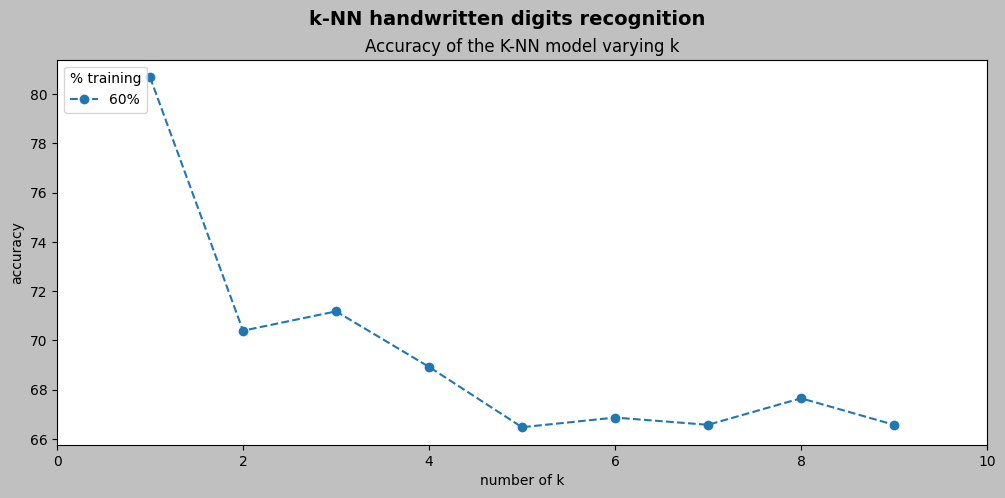

In [ ]:
from collections import defaultdict
# Train the KNN model:
print('Training KNN model - raw pixels as features')
knn = cv2.ml.KNearest_create()
knn.train(raw_descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)

# Create a dictionary to store the accuracy when testing:
results = defaultdict(list)

for k in np.arange(1, 10):
    ret, result, neighbours, dist = knn.findNearest(raw_descriptors_test, k)
    acc = get_accuracy(result, labels_test)
    print(" {}".format("%.2f" % acc))
    results['50'].append(acc)

# Show all results using matplotlib capabilities:
# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(12, 5))
plt.suptitle("k-NN handwritten digits recognition", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

ax = plt.subplot(1, 1, 1)
ax.set_xlim(0, 10)
dim = np.arange(1, 10)

for key in results:
    ax.plot(dim, results[key], linestyle='--', marker='o', label="60%")

plt.legend(loc='upper left', title="% training")
plt.title('Accuracy of the K-NN model varying k')
plt.xlabel("number of k")
plt.ylabel("accuracy")
plt.show()

### Validation.

This code utilizes the previously trained KNN model to predict the labels of the validation data <code>raw_descriptors_val</code>. Then, it calculates the model's accuracy on the validation data using the predicted labels <code>result_val</code> and the actual labels <code>labels_val</code>. Finally, it prints the calculated validation accuracy.

In [ ]:
k = 3
# This code utilizes the trained KNN model to predict the labels of the validation data.
ret_val, result_val, neighbours_val, dist_val = knn.findNearest(raw_descriptors_val, k)

# Calculate the accuracy using the predicted labels and the actual labels of the validation data.
acc_val = get_accuracy(result_val, labels_val)
print("Validation Accuracy: {}".format(acc_val))

Validation Accuracy: 71.47058823529412


This code prints the predicted labels alongside the corresponding image numbers for the validation dataset. It iterates over each prediction and true label pair, obtained by zipping together <code>result_val.flatten()</code> predicted labels and <code>labels_val</code> true labels. For each pair, it prints the image number <code>taken from val_numbers</code>, the predicted label, and the true label.

In [ ]:
for i, (predicted_label, true_label) in enumerate(zip(result_val.flatten(), labels_val)):
    print("Image {}: Predicted Label: {}, True Label: {}".format(val_numbers[i], int(predicted_label), int(true_label)))

Image 0: Predicted Label: 0, True Label: 0
Image 2: Predicted Label: 0, True Label: 0
Image 8: Predicted Label: 0, True Label: 0
Image 9: Predicted Label: 0, True Label: 0
Image 10: Predicted Label: 0, True Label: 0
Image 11: Predicted Label: 0, True Label: 0
Image 14: Predicted Label: 0, True Label: 0
Image 18: Predicted Label: 2, True Label: 0
Image 19: Predicted Label: 2, True Label: 0
Image 37: Predicted Label: 0, True Label: 0
Image 45: Predicted Label: 0, True Label: 0
Image 49: Predicted Label: 3, True Label: 0
Image 61: Predicted Label: 0, True Label: 0
Image 63: Predicted Label: 2, True Label: 0
Image 69: Predicted Label: 3, True Label: 0
Image 78: Predicted Label: 0, True Label: 0
Image 79: Predicted Label: 2, True Label: 0
Image 83: Predicted Label: 2, True Label: 0
Image 88: Predicted Label: 2, True Label: 0
Image 99: Predicted Label: 1, True Label: 0
Image 108: Predicted Label: 2, True Label: 0
Image 112: Predicted Label: 3, True Label: 0
Image 118: Predicted Label: 0, Tru

## Train the KNN with HOG descriptors.

In [ ]:
def get_hog():
    """Obtiene un descriptor HOG preconfigurado"""
    win_size = (28, 28)  # Tamaño de la ventana
    block_size = (14, 14)  # Tamaño del bloque (la mitad del tamaño de la ventana)
    block_stride = (7, 7)  # Paso del bloque (la mitad del tamaño del bloque)
    cell_size = (7, 7)  # Tamaño de la celda (igual al tamaño del paso del bloque)
    num_bins = 9  # Número de bins en el histograma
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)
    return hog

In [ ]:
# Obtener el descriptor HOG
hog = get_hog()

# Calcular los descriptores HOG para todas las imágenes
hog_descriptors = []
for img in images:
    hog_descriptors.append(hog.compute(img))
hog_descriptors = np.squeeze(hog_descriptors)

In [ ]:
hog_descriptors_train = hog_descriptors[train_numbers]
hog_descriptors_test = hog_descriptors[test_numbers]
hog_descriptors_val = hog_descriptors[val_numbers]

In [ ]:
# Train the KNN model:
print('Training KNN model - HOG features')

# Crear el clasificador KNN
knn = cv2.ml.KNearest_create()

# Entrenar el modelo KNN
knn.train(hog_descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)

# Testear el modelo creado
k = 3
ret, result, neighbours, dist = knn.findNearest(hog_descriptors_test, k)

# Calcular la precisión
acc = get_accuracy(result, labels_test)
print("Accuracy: {}".format(acc))

Training KNN model - HOG features
Accuracy: 88.4313725490196


Training KNN model - raw pixels as features
 91.96
 86.27
 88.43
 85.59
 85.78
 85.10
 85.20
 84.12
 83.73


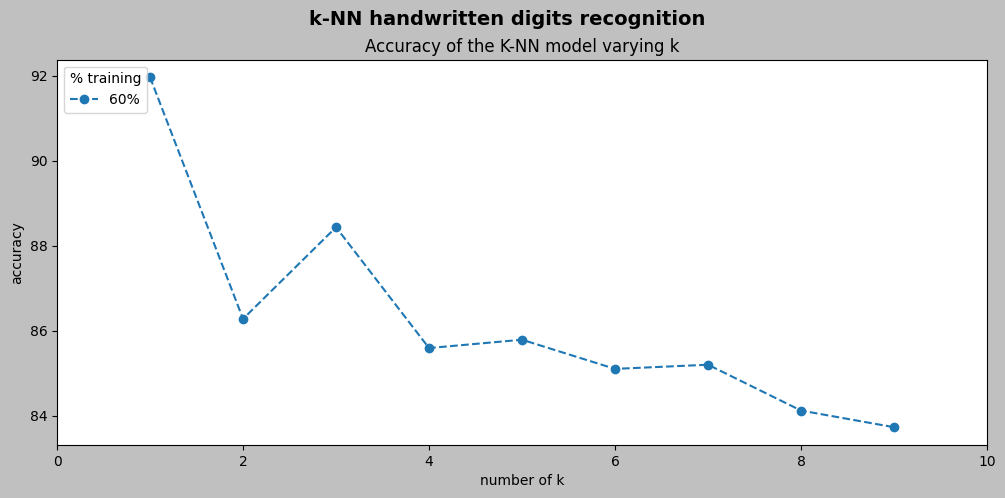

In [ ]:
from collections import defaultdict
# Train the KNN model:
print('Training KNN model - raw pixels as features')
knn = cv2.ml.KNearest_create()
knn.train(hog_descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)

# Create a dictionary to store the accuracy when testing:
results = defaultdict(list)

for k in np.arange(1, 10):
    ret, result, neighbours, dist = knn.findNearest(hog_descriptors_test, k)
    acc = get_accuracy(result, labels_test)
    print(" {}".format("%.2f" % acc))
    results['50'].append(acc)

# Show all results using matplotlib capabilities:
# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(12, 5))
plt.suptitle("k-NN handwritten digits recognition", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

ax = plt.subplot(1, 1, 1)
ax.set_xlim(0, 10)
dim = np.arange(1, 10)

for key in results:
    ax.plot(dim, results[key], linestyle='--', marker='o', label="60%")

plt.legend(loc='upper left', title="% training")
plt.title('Accuracy of the K-NN model varying k')
plt.xlabel("number of k")
plt.ylabel("accuracy")
plt.show()